## Let's analyze user activity (their visits)

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../datasets/checking-logs.sqlite")

In [3]:
sql = """
SELECT datetime
FROM pageviews
WHERE uid LIKE "user_%"
"""
print(pd.read_sql(sql,con))

                       datetime
0    2020-04-17 22:46:26.785035
1    2020-04-18 10:53:52.623447
2    2020-04-18 10:56:55.833899
3    2020-04-18 10:57:37.331258
4    2020-04-18 12:05:48.200144
..                          ...
982  2020-05-21 18:45:20.441142
983  2020-05-21 23:03:06.457819
984  2020-05-21 23:23:49.995349
985  2020-05-22 11:30:18.368990
986  2020-05-22 18:22:22.847815

[987 rows x 1 columns]


#### Using Pandas, create a new dataframe where the visits are counted and grouped by date

In [4]:
sql = """
SELECT  DATE(datetime) as day, 
    COUNT(*) as views
FROM pageviews
WHERE uid LIKE "user_%"
GROUP BY day
"""
df = pd.read_sql(sql,con, parse_dates='datetime')
print(df)

           day  views
0   2020-04-17      1
1   2020-04-18     23
2   2020-04-19     15
3   2020-04-21      3
4   2020-04-22      1
5   2020-04-23      5
6   2020-04-25      1
7   2020-04-26      8
8   2020-04-28      2
9   2020-04-29      4
10  2020-04-30      9
11  2020-05-01      3
12  2020-05-02      6
13  2020-05-03     19
14  2020-05-04      1
15  2020-05-05      1
16  2020-05-06      3
17  2020-05-07      2
18  2020-05-08     48
19  2020-05-09     19
20  2020-05-10    110
21  2020-05-11    200
22  2020-05-12     85
23  2020-05-13    102
24  2020-05-14    187
25  2020-05-15     29
26  2020-05-16      4
27  2020-05-17      9
28  2020-05-18     51
29  2020-05-19     11
30  2020-05-20     12
31  2020-05-21     11
32  2020-05-22      2


#### Using Pandas method .plot(), create a graph

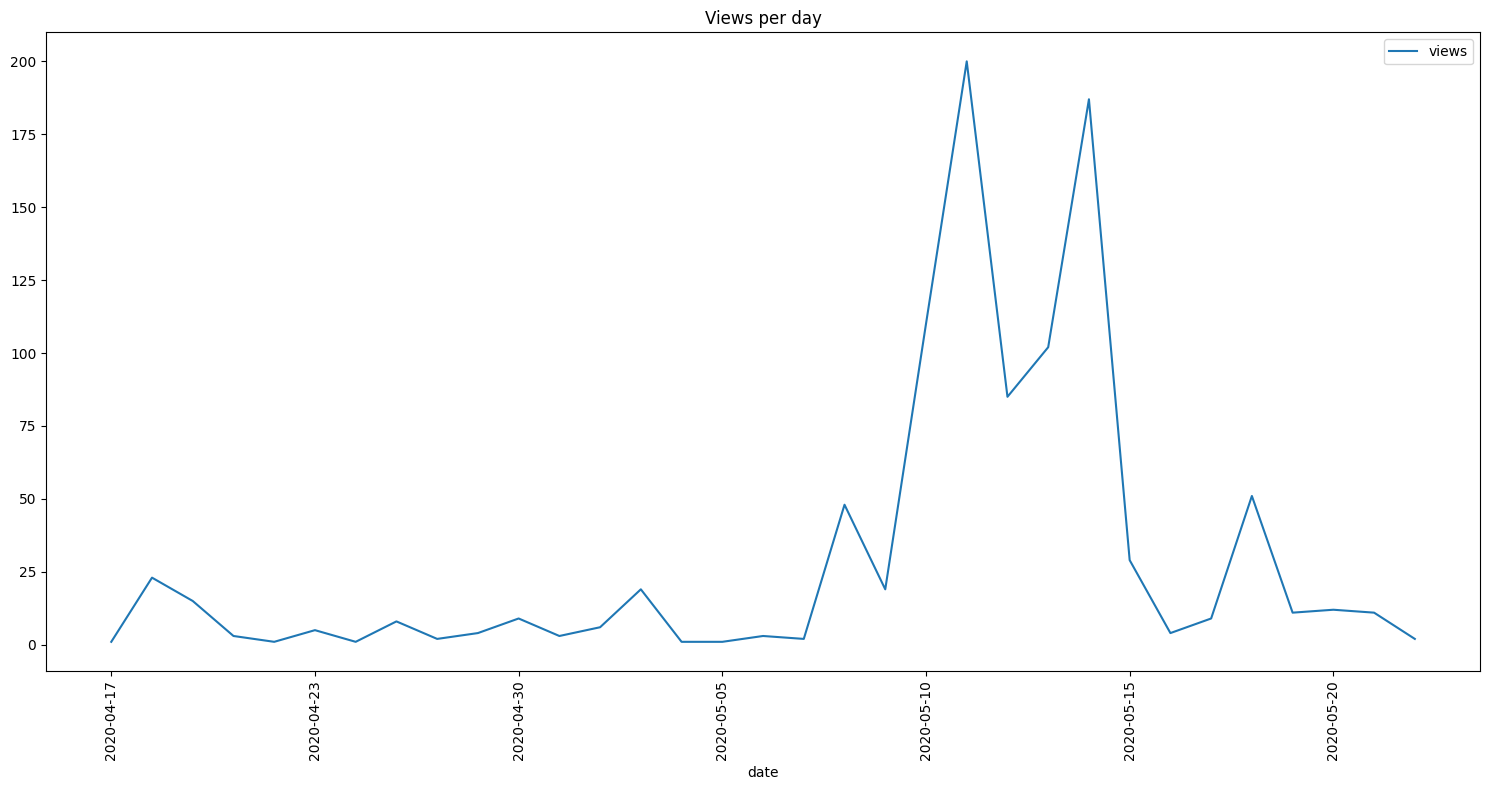

In [5]:
ax = df.plot(
    x='day',
    y='views',
    figsize=(15, 8),
    title='Views per day',
    rot=90,
)

ax.set_xlabel('date')

ax.figure.tight_layout()

In [6]:
con.close()